In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display
from PIL import Image

dataname = 'img1.8'

,0.000000000000000000e+00,-1.544043999999999972e-02,-1.291824000000000097e-02
0,6.400000e-08,-0.018014,-0.012918
1,1.280000e-07,-0.012867,-0.015502
2,1.920000e-07,-0.015440,-0.012918
3,2.560000e-07,-0.012867,-0.007751
4,3.200000e-07,-0.018014,-0.002584
...,...,...,...
16378,1.048256e-03,-0.015440,-0.012918
16379,1.048320e-03,-0.012867,-0.018086
16380,1.048384e-03,-0.010294,-0.012918
16381,1.048448e-03,-0.015440,-0.015502


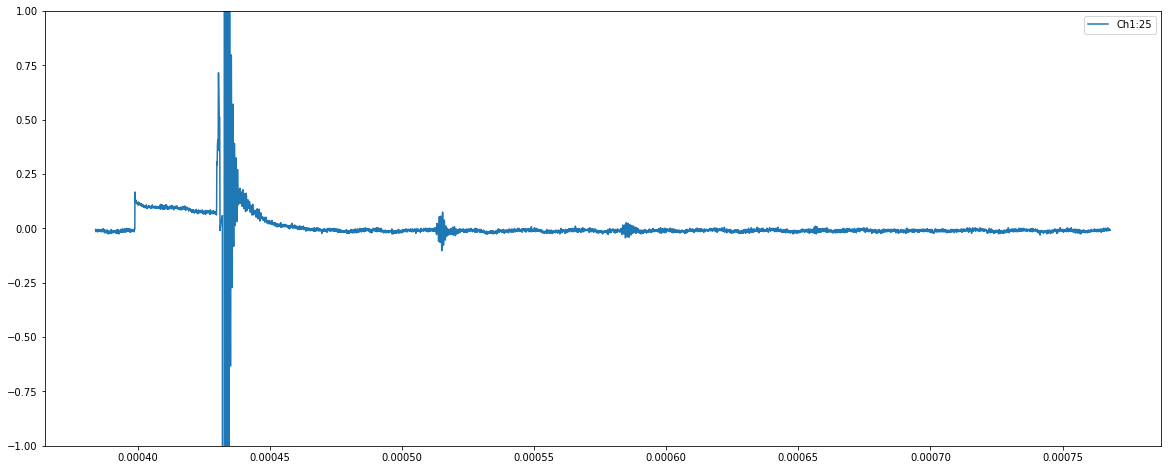

In [4]:
plt.figure(figsize=(20, 8))
i = 20
for i in range(25, 26):
    test_pulse = pd.read_csv(f'{dataname}/{dataname}_{i}.0.csv')
    x = test_pulse.iloc[:, 0]
    plt.plot(x[6000:12000], test_pulse.iloc[6000:12000, 1], label=f'Ch1:{i}')
display(test_pulse)
plt.ylim(-1, 1)
plt.legend()
plt.show()

In [5]:


def cleanImagePulse(filename, i, n=3, dataMin = 7000, size = 16384, graph = False):   
    # dataMin is the data required for the pulse to be considered valid - must be >100
    data = np.zeros(dataMin)
    count = 0
    # find a data pulse that works
    for j in range(n):
        data_temp = pd.read_csv(f'{filename}/{filename}_{i}.{j}.csv')
        # if the pulse is located at the end or not existant go to the next one and skip this one
        if np.max(data_temp.iloc[:-dataMin, 2].values) < 0.75:
            continue
        cutoff = np.argmax(data_temp.iloc[:-dataMin, 1].values)
        count += 1
        data += data_temp.iloc[cutoff:cutoff+dataMin, 1].values
    data = data/count
    y = data[500:dataMin-500]
    y -= np.mean(y)
    x = np.arange(len(y))*data_temp.iloc[1,0]
    
    if graph:
        plt.figure(figsize=(20, 8))
        plt.plot(x, y, label=f'{filename}_{i}.{j}')
        plt.ylim(-1, 1)
        plt.legend()
        plt.show()
    return x, y

def graphPulse(filename, i, j=0, show=True):
    plt.figure(figsize=(20, 8))
    test_pulse = pd.read_csv(f'{filename}/{filename}_{i}.{j}.csv')
    plt.plot(test_pulse.iloc[:, 0], test_pulse.iloc[:, 1], label=f'{filename}_{i}.{j}')
    if show:
        plt.ylim(-1, 1)
        plt.legend()
        plt.show()

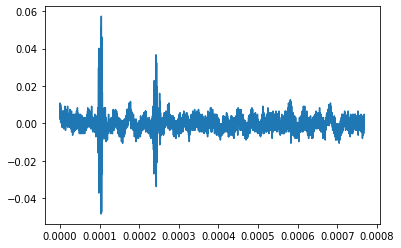

In [6]:
x3, y3 = cleanImagePulse(dataname, 20)
plt.plot(x3, y3)
plt.show()

100%|██████████| 49/49 [00:02<00:00, 22.08it/s]


0.02


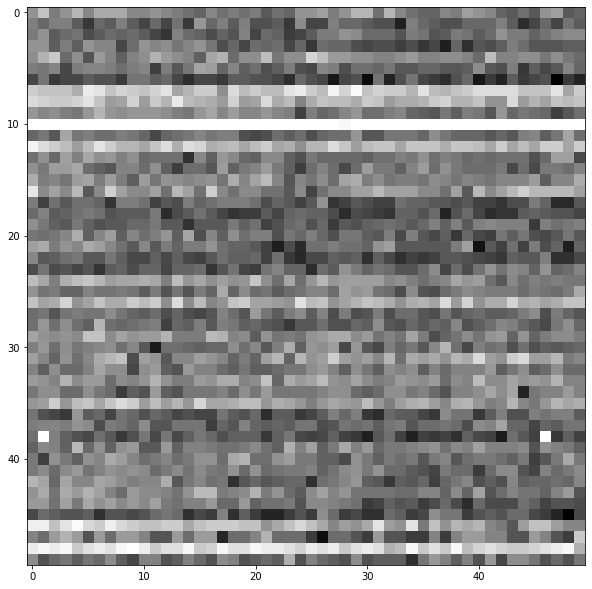

In [7]:
x1, y1 = cleanImagePulse(dataname, 0)
y1 = y1[:50]
img = y1
for i in tqdm(range(1, 50)):
    x2, y2 = cleanImagePulse(dataname, i)
    y2 = y2[:50]
    img = np.vstack((img, y2))
img[np.abs(img) > 0.02] = 0.02
# print(np.max(img))
# img = np.abs(img.T*50)
# img = np.random.rand(5, 5)
print(img[10, 23])
plt.figure(figsize=(10, 12))
plt.gray()
plt.imshow(img)
plt.show()
# 

100%|██████████| 79/79 [00:07<00:00, 10.90it/s]


0.02


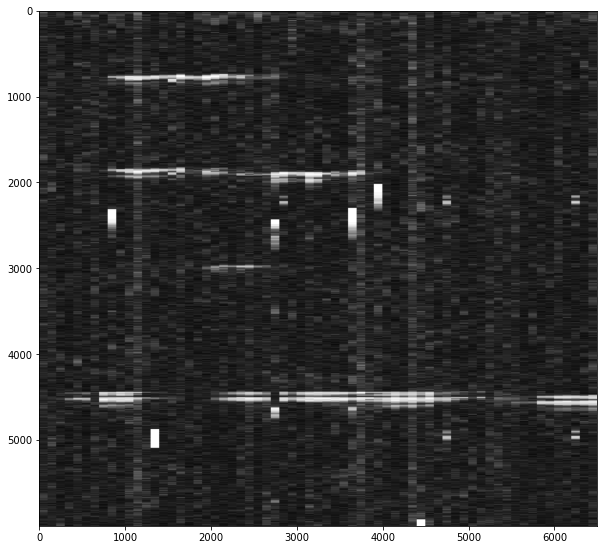

In [8]:
x1, y1 = cleanImagePulse(dataname, 0)
img = np.array([y1]*100)
for i in tqdm(range(1, 80)):
    x2, y2 = cleanImagePulse(dataname, i)
    if np.max(y2) > 3:
        continue
    img = np.vstack((img, np.array([y2]*100)))
# print(img[800, 2000])
# img[np.abs(img) > 0.06] = 0.002
img[np.abs(img) > 0.02] = 0.02
print(np.max(img))
img = np.abs(img.T*50)
# img = np.random.rand(5, 5)

plt.figure(figsize=(10, 12))
plt.gray()
plt.imshow(img)
plt.show()
# 